In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\b84266591\Desktop\Tech\MJ TINGs\cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


<h3> Update Feature Engineering </h3>

In [4]:
df['height']=df['height']*0.01
df['bmi'] = (df['weight'] / (df['height'] ** 2)).astype('int')
df['age'] = (df['age'] / 365).round().astype('int')

# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new feature
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# Define age groups
def categorize_age(age):
    if age < 40:
        return 'Young'
    elif 40 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply the function to create a new feature
df['age_group'] = df['age'].apply(categorize_age)

# Define blood pressure categories
def categorize_bp(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif ap_hi >= 140 or ap_lo >= 90:
        return 'Hypertension'
    else:
        return 'High-Normal'

# Apply the function to create a new feature
df['bp_category'] = df.apply(lambda row: categorize_bp(row['ap_hi'], row['ap_lo']), axis=1)

In [7]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,age_group,bp_category
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21,Normal,Middle-aged,High-Normal
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34,Obese,Middle-aged,Hypertension
2,2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,23,Normal,Middle-aged,High-Normal
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28,Overweight,Middle-aged,Hypertension
4,4,48,1,1.56,56.0,100,60,1,1,0,0,0,0,23,Normal,Middle-aged,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,1.68,76.0,120,80,1,1,1,0,1,0,26,Overweight,Middle-aged,High-Normal
69996,99995,62,1,1.58,126.0,140,90,2,2,0,0,1,1,50,Obese,Senior,Hypertension
69997,99996,52,2,1.83,105.0,180,90,3,1,0,1,0,1,31,Obese,Middle-aged,Hypertension
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,27,Overweight,Senior,High-Normal


<h2> Building the Model </h2>

In [8]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
df = df.drop(columns=['id'])

In [45]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,age_group,bp_category
0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21,Normal,Middle-aged,High-Normal
1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34,Obese,Middle-aged,Hypertension
2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,23,Normal,Middle-aged,High-Normal
3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28,Overweight,Middle-aged,Hypertension
4,48,1,1.56,56.0,100,60,1,1,0,0,0,0,23,Normal,Middle-aged,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,2,1.68,76.0,120,80,1,1,1,0,1,0,26,Overweight,Middle-aged,High-Normal
69996,62,1,1.58,126.0,140,90,2,2,0,0,1,1,50,Obese,Senior,Hypertension
69997,52,2,1.83,105.0,180,90,3,1,0,1,0,1,31,Obese,Middle-aged,Hypertension
69998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,27,Overweight,Senior,High-Normal


In [57]:
df=pd.get_dummies(df)

In [58]:
# Define features (X) and target (y)
features = df.drop(columns=['cardio'])  # Exclude the target variable
target = df['cardio']

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [60]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi',
       'bmi_category_Normal', 'bmi_category_Obese', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'age_group_Middle-aged', 'age_group_Senior',
       'age_group_Young', 'bp_category_High-Normal',
       'bp_category_Hypertension', 'bp_category_Normal'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       70000 non-null  int32  
 1   gender                    70000 non-null  int64  
 2   height                    70000 non-null  float64
 3   weight                    70000 non-null  float64
 4   ap_hi                     70000 non-null  int64  
 5   ap_lo                     70000 non-null  int64  
 6   cholesterol               70000 non-null  int64  
 7   gluc                      70000 non-null  int64  
 8   smoke                     70000 non-null  int64  
 9   alco                      70000 non-null  int64  
 10  active                    70000 non-null  int64  
 11  cardio                    70000 non-null  int64  
 12  bmi                       70000 non-null  int32  
 13  bmi_category_Normal       70000 non-null  uint8  
 14  bmi_ca

In [62]:
# Define which features are numerical and which are categorical
numerical_features = ['age', 'bmi', 'height', 'weight', 'ap_hi', 'ap_ho',
                     'gender', 'cholesterol', 'gluc', 'smoke', 'alco',
                     'active']  # List the names of numerical columns
categorical_features = ['age_group', 'bmi_category', 'bp_category']  # List the names of categorical columns

In [63]:
# Create transformers for feature scaling and one-hot encoding
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [64]:
# Use a ColumnTransformer to apply the transformers to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [65]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [66]:
# Create a pipeline that combines preprocessing and the classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_classifier)])

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
classifier_rf=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [69]:
%%time
classifier_rf.fit(X_train, y_train)

CPU times: total: 6.02 s
Wall time: 2.09 s


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [70]:
classifier_rf.oob_score_

0.7276428571428571

<h2> Hyperparameter Tuning using GridSearch CV </h2>

In [72]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

#%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [73]:
grid_search.best_score_

0.735125

In [74]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=200,
                       n_jobs=-1, random_state=42)

From hyperparameter tuning, we can fetch the best estimator, as shown. The best set of parameters identified was max_depth=10, min_samples_leaf=20,n_estimators=200

In [92]:
%matplotlib inline
from sklearn.tree import plot_tree
#plt.figure(figsize=(80,40))
#plt.figure(figsize=(16, 8))  # Smaller figure size
#plot_tree(rf_best.estimators_[5], feature_names=features.columns, class_names=['Disease', "No Disease"],filled=True);


In [88]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
#plot_tree(rf_best.estimators_[7], feature_names=features.columns, class_names=['Disease', 'No Disease'], filled=True)
#plt.show()

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

[Text(0.5409367108585859, 0.9545454545454546, 'bp_category_High-Normal <= 0.5\ngini = 0.5\nsamples = 35409\nvalue = [28114, 27886]\nclass = Disease'),
 Text(0.26548690025252525, 0.8636363636363636, 'ap_lo <= 79.5\ngini = 0.47\nsamples = 17326\nvalue = [10365, 17085]\nclass = No Disease'),
 Text(0.14851641414141414, 0.7727272727272727, 'ap_hi <= 129.5\ngini = 0.37\nsamples = 5104\nvalue = [6121, 1991]\nclass = Disease'),
 Text(0.11773989898989899, 0.6818181818181818, 'cholesterol <= 2.5\ngini = 0.334\nsamples = 4797\nvalue = [6019, 1619]\nclass = Disease'),
 Text(0.07386363636363637, 0.5909090909090909, 'bmi <= 23.5\ngini = 0.313\nsamples = 4580\nvalue = [5878, 1419]\nclass = Disease'),
 Text(0.034406565656565656, 0.5, 'weight <= 56.5\ngini = 0.256\nsamples = 1890\nvalue = [2574, 457]\nclass = Disease'),
 Text(0.013888888888888888, 0.4090909090909091, 'age_group_Middle-aged <= 0.5\ngini = 0.204\nsamples = 753\nvalue = [1066, 139]\nclass = Disease'),
 Text(0.007575757575757576, 0.3181818

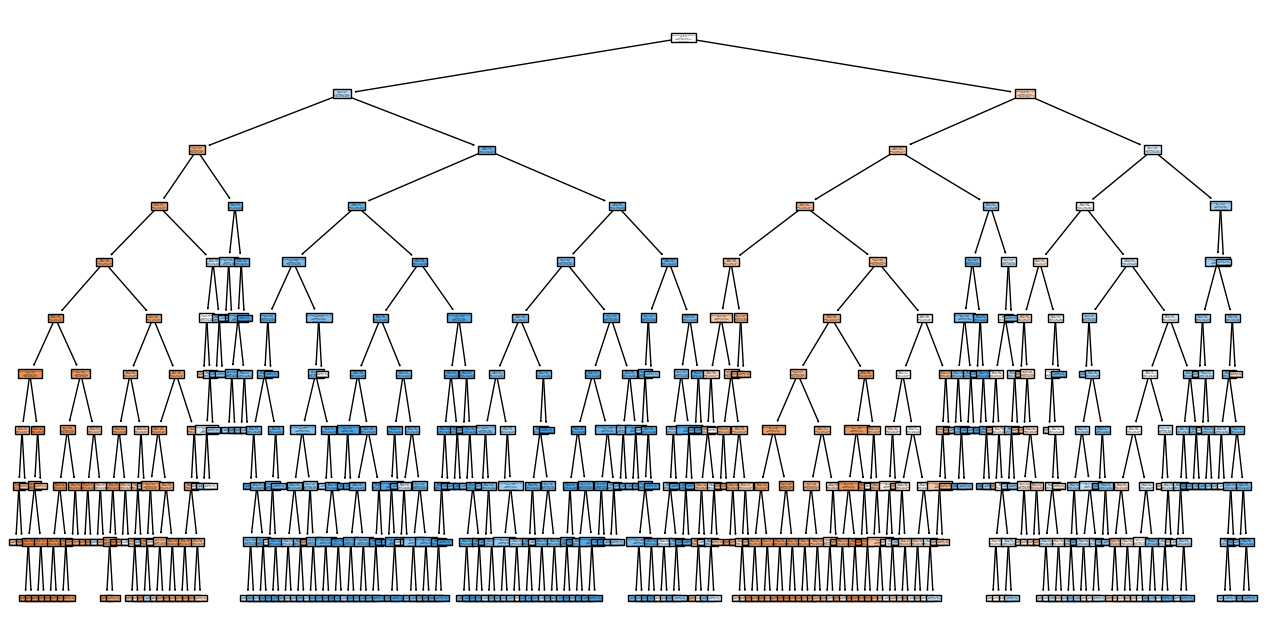

In [93]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the Index to a list of feature names
feature_names_list = list(features.columns)

plt.figure(figsize=(16, 8))  # Adjust the figure size if needed
plot_tree(rf_best.estimators_[5], feature_names=feature_names_list, class_names=['Disease', 'No Disease'], filled=True)

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,age_group,bp_category
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,21,Normal,Middle-aged,High-Normal
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,34,Obese,Middle-aged,Hypertension
2,2,52,1,1.65,64.0,130,70,3,1,0,0,0,1,23,Normal,Middle-aged,High-Normal
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1,28,Overweight,Middle-aged,Hypertension
4,4,48,1,1.56,56.0,100,60,1,1,0,0,0,0,23,Normal,Middle-aged,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,1.68,76.0,120,80,1,1,1,0,1,0,26,Overweight,Middle-aged,High-Normal
69996,99995,62,1,1.58,126.0,140,90,2,2,0,0,1,1,50,Obese,Senior,Hypertension
69997,99996,52,2,1.83,105.0,180,90,3,1,0,1,0,1,31,Obese,Middle-aged,Hypertension
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1,27,Overweight,Senior,High-Normal
